## Importando librerías

In [ ]:
#Done in Kaggle with Dataset
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

## Creación del modelo convolucional

In [ ]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()




2021-11-11 22:29:41.552722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2021-11-11 22:29:41.659105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 22:29:41.660250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-11 22:29:41.662706: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-11 22:29:41.663940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

## Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Reescalar los datos

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [ ]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.hdf5',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compilando el modelo

In [ ]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

## Entrenando el modelo

In [ ]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])

2021-11-11 22:31:15.956654: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2021-11-11 22:31:18.393135: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 36s 458ms/step - loss: 0.7101 - accuracy: 0.4995 - val_loss: 0.6924 - val_accuracy: 0.4990

Epoch 00001: val_accuracy improved from -inf to 0.49899, saving model to modelo_perros_gatos.hdf5
Epoch 2/100
62/62 [==============================] - 21s 340ms/step - loss: 0.6896 - accuracy: 0.5239 - val_loss: 0.6631 - val_accuracy: 0.5857

Epoch 00002: val_accuracy improved from 0.49899 to 0.58569, saving model to modelo_perros_gatos.hdf5
Epoch 3/100
62/62 [==============================] - 20s 326ms/step - loss: 0.6836 - accuracy: 0.5559 - val_loss: 0.6818 - val_accuracy: 0.5474

Epoch 00003: val_accuracy did not improve from 0.58569
Epoch 4/100
62/62 [==============================] - 21s 334ms/step - loss: 0.6870 - accuracy: 0.5437 - val_loss: 0.6937 - val_accuracy: 0.5010

Epoch 00004: val_accuracy did not improve from 0.58569
Epoch 5/100
62/62 [==============================] - 21s 337ms/step - loss: 0.6940 - accuracy: 0.4848 - val_loss: 0.6933 - 

## Resultados

In [ ]:
import matplotlib.pyplot as plt

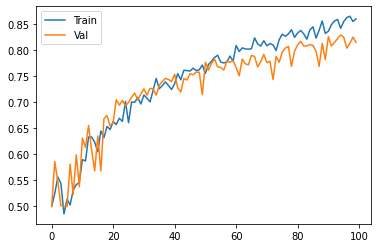

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [ ]:
model2 = model 

In [ ]:
model2.load_weights('./modelo_perros_gatos.hdf5')

In [ ]:
model2.evaluate(test_generator)

32/32 [==============================] - 6s 192ms/step - loss: 0.4181 - accuracy: 0.8210


[0.4181146025657654, 0.8209999799728394]